# SGD를 사용하여 2차 함수 모델 fiiting하기

In [1]:
import tensorflow as tf
from helper import generate_batches
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 생성하기

In [2]:
# function
f = lambda x: x**2 + 0.3 * x + 5.0

In [3]:
x_train = np.linspace(-1, 1, 50)
fx = f(x_train)

In [4]:
np.random.seed(320)
y_train = fx + 0.3 * np.random.rand(len(x_train))

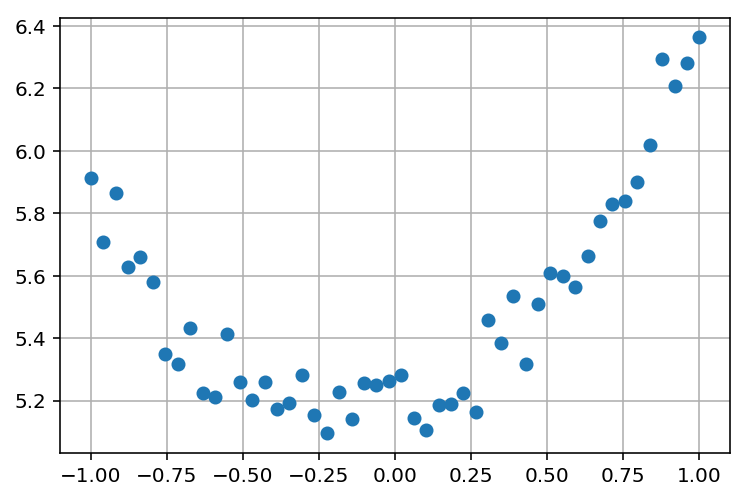

In [5]:
plt.plot(x_train,y_train, 'o')
plt.grid()
plt.show()

## Quadratic Model의 다른 관점 1
$$
f(x_i,W) = Wx_i =
\begin{bmatrix}
w_0& w_1 & w_2
\end{bmatrix}
\begin{bmatrix}
x_i^2 \\ x_i \\ 1
\end{bmatrix}
$$

## Gradient Descent Method

In [6]:
W = tf.Variable(np.array([[-1.0, -1.0, -1.0]]), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

loss = tf.reduce_mean(tf.square(tf.matmul(W, x) - y))

batch_size = 10
lr = 0.01
MaxEpochs = 1000
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

feature_train = np.array([[xval**2, xval, 1] for xval in x_train]).T

print(W.shape)
print(feature_train.shape)
print(y_train.shape)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 100 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x:feature_train, y:y_train})
            print(epoch, curr_w,curr_loss)
        sess.run(train, feed_dict={x:feature_train, y:y_train})
    
    w_tf_sgd1 = sess.run(W)

(1, 3)
(3, 50)
(50,)
0 [[-1. -1. -1.]] 47.673477
100 [[ 1.0001713  -0.36488652  4.4420304 ]] 0.63747185
200 [[ 1.1618533  -0.04832806  5.0091887 ]] 0.052224018
300 [[1.143611   0.10945351 5.0798063 ]] 0.019726615
400 [[1.1125499  0.18809624 5.0980387 ]] 0.012003115
500 [[1.0847601  0.22729403 5.1092305 ]] 0.00951154
600 [[1.0611571  0.24683127 5.118246  ]] 0.008476522
700 [[1.0412304  0.25656924 5.125809  ]] 0.00792326
800 [[1.0244193  0.26142296 5.1321836 ]] 0.0075750994
900 [[1.0102389 0.2638422 5.1375604]] 0.0073386617


In [7]:
w_tf_sgd1

array([[0.9982765 , 0.26504803, 5.142096  ]], dtype=float32)

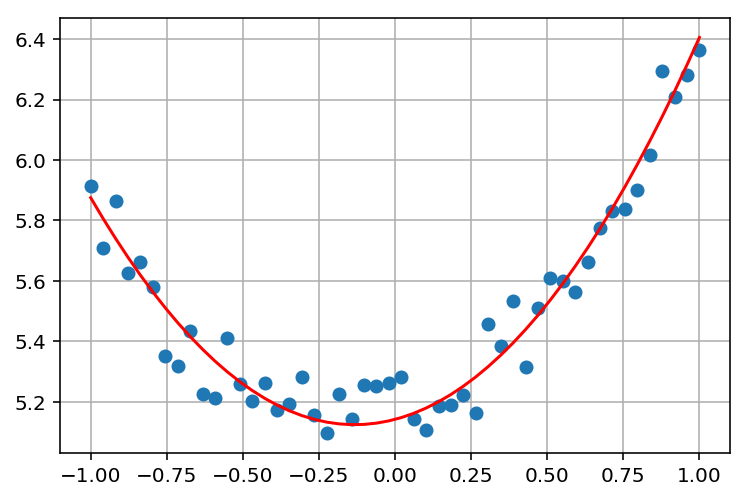

In [8]:
feature_train = np.array([[xval**2, xval, 1] for xval in x_train]).T
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(w_tf_sgd1, feature_train).flatten() , 'r-')
plt.grid()
plt.show()

## Quadratic Model의 다른 관점 2
$$
f(x_i,W) = x_iW  =
\begin{bmatrix}
x_i^2 & x_i & 1
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2
\end{bmatrix}
$$

In [9]:
from sklearn import linear_model
feature_train = [[xval**2, xval, 1.0] for xval in x_train]
reg = linear_model.LinearRegression()
reg.fit(feature_train, y_train)
print(reg.coef_, reg.intercept_)

[0.93377785 0.26624613 0.        ] 5.166551916620308


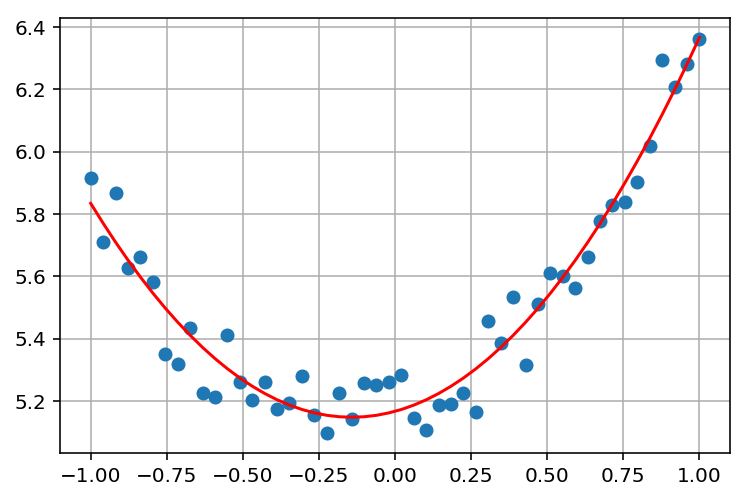

In [10]:
plt.plot(x_train,y_train, 'o')
plt.plot(x_train,reg.predict(feature_train), 'r-')
plt.grid()
plt.show()

### Gradient Descent

In [11]:
import tensorflow as tf
from helper import generate_batches
W = tf.Variable(np.array([-1.0, -1.0, -1.0]).reshape(-1,1), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32, shape=(50,3))
y = tf.placeholder(dtype=tf.float32, shape=(50,1))

print(tf.matmul(x, W))

loss = tf.reduce_mean(tf.square(tf.matmul(x, W) - y))

lr = 0.01
MaxEpochs = 1000
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

feature_train = np.array([[xval**2, xval, 1] for xval in x_train])

print(feature_train.shape)
print(W.shape)
print(y_train.shape)
print(y_train.reshape(-1,1).shape)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 100 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x:feature_train, y:y_train.reshape(-1,1)})
        sess.run(train, feed_dict={x:feature_train, y:y_train.reshape(-1,1)}) # 수정후
    w_tf_gd = sess.run(W)
print(w_tf_gd)

Tensor("MatMul_1:0", shape=(50, 1), dtype=float32)
(50, 3)
(3, 1)
(50,)
(50, 1)
[[0.9982765 ]
 [0.26504803]
 [5.142096  ]]


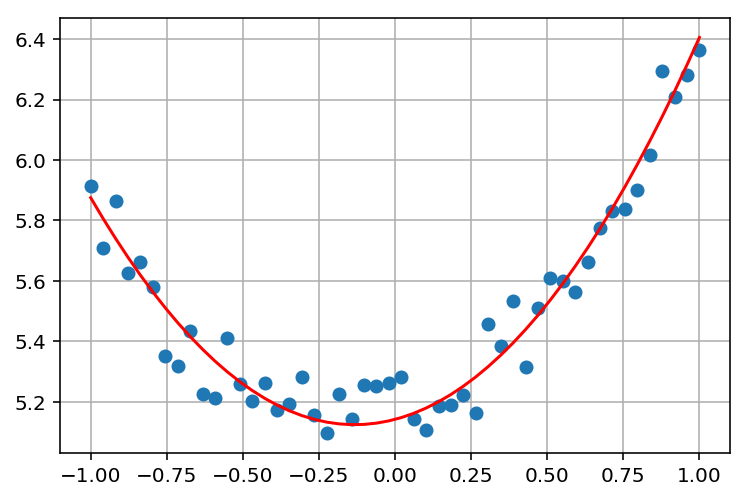

In [12]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(feature_train, w_tf_gd).flatten() , 'r-')
plt.grid()
plt.show()

###  Stochastic Gradient Descent 적용
1. 다음과 같이 Parameter를 설정
    1. `batch_size=10`
    1. `learning_rate=0.01`
    1. `w0=np.array([-1.0, -1.0, -1.0])`
    1. `MaxEpochs = 1000`
1. `np.random.shuffle()` 이용하여 데이터 골고루 섞기
1. 아래 for loop 안에 SGD를 구현하시면 됩니다.
    ```python
    for epoch in range(MaxEpochs):
        for x_batch, y_batch in generate_batches(_, _, _):
            # do gradient descent with x_batch and y_batch
    ```

In [13]:
W = tf.Variable(np.array([-1.0, -1.0, -1.0]).reshape(-1,1), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32, shape=(None,3))
y = tf.placeholder(dtype=tf.float32, shape=(None,1))

loss = tf.reduce_mean(tf.square(tf.matmul(x, W) - y))

# TODO1
batch_size = 10
lr = 0.01
MaxEpochs = 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

np.random.seed(320)
# TODO2
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = np.array([[xval**2, xval, 1] for xval in x_train[shuffled_id]])
shuffled_y_train = y_train[shuffled_id].reshape(-1,1)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 100 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x:shuffled_x_train, y:shuffled_y_train})
            print(epoch, curr_w.flatten(),curr_loss)
        # TODO3
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    w_tf_sgd = sess.run(W)

0 [-1. -1. -1.] 47.67348
100 [1.0846667  0.22650437 5.109171  ] 0.009531305
200 [0.99798834 0.2647058  5.1420274 ] 0.0071707126
300 [0.96108884 0.26589617 5.156017  ] 0.006841204
400 [0.9453699 0.2659415 5.161978 ] 0.006781572
500 [0.93867177 0.2659467  5.1645203 ] 0.006770754
600 [0.9358202  0.26594833 5.1655984 ] 0.006768795
700 [0.9346014  0.26594904 5.1660633 ] 0.0067684455
800 [0.93408096 0.26594946 5.1662602 ] 0.006768384
900 [0.93386173 0.26594982 5.1663465 ] 0.0067683714


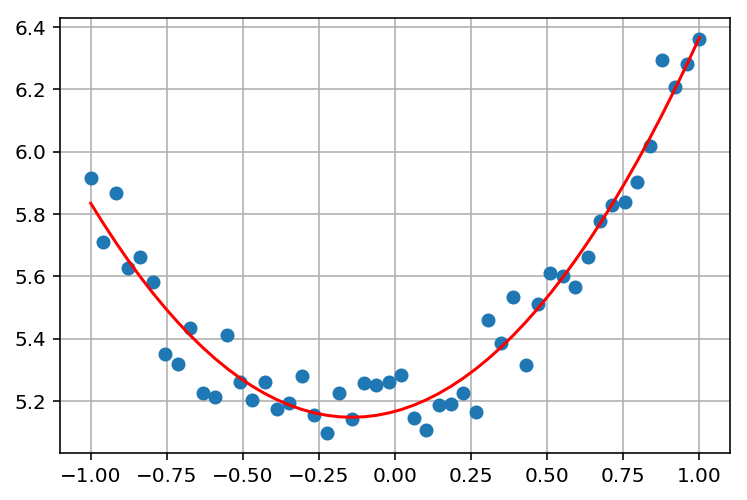

In [14]:
feature_train = np.array([[xval**2, xval, 1] for xval in x_train])
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(feature_train, w_tf_sgd).flatten() , 'r-')
plt.grid()
plt.show()